# 针对传感器测试样例数据

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/temp_data/sensor.csv",encoding="gbk")
data

,#,日期-时间 (China Standard Time),Ch:2 - 温度 (°C),Ch:3 - 相对湿度 (%),Ch:4 - 光 (lux),露点 (°C),传感器已通电,传感器未通电,连接的主机,文件结尾
0,1,07/14/2023 14:06:26,25.257,56.78,72.60,16.09,NaN,NaN,NaN,NaN
1,2,07/14/2023 14:06:31,25.236,56.69,71.00,16.05,NaN,NaN,NaN,NaN
2,3,07/14/2023 14:06:36,25.212,56.48,98.92,15.97,NaN,NaN,NaN,NaN
3,4,07/14/2023 14:06:41,25.195,56.41,103.32,15.93,NaN,NaN,NaN,NaN
4,5,07/14/2023 14:06:46,25.177,56.27,102.24,15.87,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2647,2648,07/14/2023 17:46:26,28.425,52.08,89.72,17.66,NaN,NaN,NaN,NaN
2648,2649,07/14/2023 17:46:29,NaN,NaN,NaN,NaN,NaN,NaN,已记录,NaN
2649,2650,07/14/2023 17:46:31,28.427,52.11,90.32,17.67,NaN,NaN,NaN,NaN
2650,2651,07/14/2023 17:46:36,28.427,52.09,90.88,17.67,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['#', '日期-时间 (China Standard Time)', 'Ch:2 - 温度   (°C)',
       'Ch:3 - 相对湿度   (%)', 'Ch:4 - 光   (lux)', '露点   (°C)', '传感器已通电',
       '传感器未通电', '连接的主机', '文件结尾'],
      dtype='object')

In [ ]:
def get_data(data):
  """
  get Light data
  """
  data = data.loc[:, ["日期-时间 (China Standard Time)","Ch:4 - 光   (lux)"]]
  data.columns = ["Time","Light"]
  data.Time = pd.to_datetime(data["Time"])
  data.set_index("Time", inplace=True,drop=True)
  data.fillna(0,inplace=True)
  return data

d = get_data(data)
d

,Light
Time,
2023-07-14 14:06:26,72.60
2023-07-14 14:06:31,71.00
2023-07-14 14:06:36,98.92
2023-07-14 14:06:41,103.32
2023-07-14 14:06:46,102.24
...,...
2023-07-14 17:46:26,89.72
2023-07-14 17:46:29,0.00
2023-07-14 17:46:31,90.32


## 动态折线图可视化

In [ ]:
from pyecharts.charts import Line
from pyecharts import options as opts

# 创建一个折线图对象
line = Line()

# 添加数据
x_data = d.index.to_list()[:100]
y_data = d.Light[:100]
line.add_xaxis(x_data)
line.add_yaxis('数据', y_data)

# 设置全局参数
line.set_global_opts(
        title_opts=opts.TitleOpts(title='Line Chart'),
        toolbox_opts=opts.ToolboxOpts(is_show=True),
        datazoom_opts=[
            opts.DataZoomOpts(),
            opts.DataZoomOpts(type_='inside')]
)
# 渲染图表
line.render('line_chart.html')
# line.render_notebook()

'/content/line_chart.html'

In [ ]:
d

## 折线图可视化

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
d = d.reset_index()
d

,Time,Light
0,2023-07-14 14:06:26,72.60
1,2023-07-14 14:06:31,71.00
2,2023-07-14 14:06:36,98.92
3,2023-07-14 14:06:41,103.32
4,2023-07-14 14:06:46,102.24
...,...,...
2647,2023-07-14 17:46:26,89.72
2648,2023-07-14 17:46:29,0.00
2649,2023-07-14 17:46:31,90.32
2650,2023-07-14 17:46:36,90.88


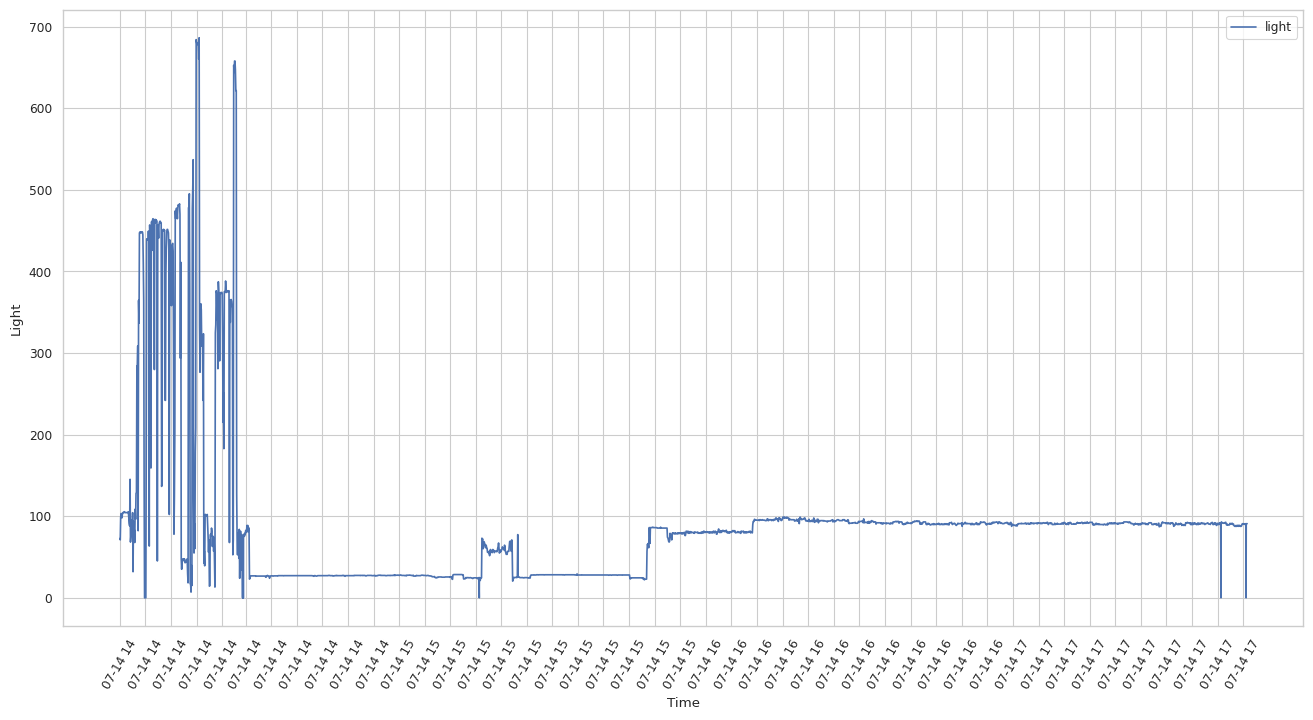

In [ ]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")
fig = plt.figure(figsize=(16, 8))
ax2 = sns.lineplot(data=d, x="Time", y='Light',label="light")
ax2.set_xticks(d.Time[::60])
ax2.set_xticklabels(d.Time[::60].dt.strftime('%m-%d %H'), rotation=60)
plt.legend()

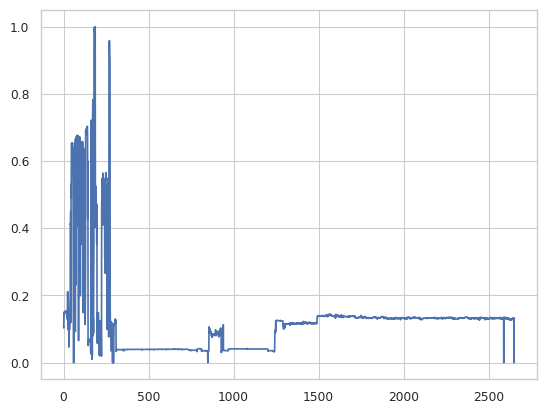

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_s = scaler.fit_transform(d)


In [ ]:
plt.plot(data_s)

# 数据构造

In [ ]:
def data_process(data, n_past=5):
  """
  get Light data
  """
  data = data.loc[:, ["日期-时间 (China Standard Time)","Ch:4 - 光   (lux)"]]
  data.columns = ["Time","Light"]
  data.Time = pd.to_datetime(data["Time"])
  data.set_index("Time", inplace=True, drop=True)
  data.fillna(method="ffill",inplace=True)
  # Nomalization
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  data = scaler.fit_transform(data)
  # print(data.shape)
  dataX = []
  dataY = []

  for i in range(n_past,len(data)):
      dataX.append(data[i-n_past:i,:])
      max_ = np.max(data[i-n_past:i,:])
      min_ = np.min(data[i-n_past:i,:])
      start = data[i-n_past]
      end = data[i]
      flag1 = max_ - min_
      flag2 = start - end
      if (flag1 <= 0.1) and (max_ > 0.1):
        dataY.append([0]) # 有人&开灯，静息状态
      elif flag1>0.1 and flag2<0:
        dataY.append([1]) # 进屋开灯
      elif flag1>0.1 and flag2>0:
        dataY.append([2]) # 离开关灯
      # elif min_ > 0.1:
      #   dataY.append([3]) # 在活动
      else:
        dataY.append([3]) # 没人关灯

  dataX, dataY = np.array(dataX), np.array(dataY)

  dataX = dataX.reshape((dataX.shape[0], n_past))
  # dataY = dataY.reshape((dataY.shape[0], dataY.shape[1], 1))

  # print(dataX.shape, dataY.shape)
  result = np.concatenate((dataX, dataY), axis=1)

  print("X:",dataX.shape,"Y:",dataY.shape, "Result:", result.shape)

  return dataX, dataY, pd.DataFrame(result)

In [ ]:
X, Y, df = data_process(data)

X: (2647, 5) Y: (2647, 1) Result: (2647, 6)


In [ ]:
df[5].value_counts()

0.0    1569
3.0     925
1.0      77
2.0      76
Name: 5, dtype: int64

## 定义模型及可视化模型效果

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder

import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time

def calculate_metrics(y_true, y_pred, duration, y_true_val=None, y_pred_val=None):
    res = pd.DataFrame(data=np.zeros((1, 4), dtype=np.float), index=[0],
                       columns=['precision', 'accuracy', 'recall', 'duration'])
    res['precision'] = precision_score(y_true, y_pred, average='macro')
    res['accuracy'] = accuracy_score(y_true, y_pred)

    if not y_true_val is None:
        # this is useful when transfer learning is used with cross validation
        res['accuracy_val'] = accuracy_score(y_true_val, y_pred_val)

    res['recall'] = recall_score(y_true, y_pred, average='macro')
    res['duration'] = duration
    return res


def plot_epochs_metric(hist, file_name, metric='loss'):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(hist.history[metric])
    plt.plot(hist.history['val_' + metric])
    plt.title('model ' + metric)
    plt.ylabel(metric, fontsize='large')
    plt.xlabel('epoch', fontsize='large')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(file_name, bbox_inches='tight')
    plt.close()

def save_logs(output_directory, hist, y_pred, y_true, duration, lr=True, y_true_val=None, y_pred_val=None):
    hist_df = pd.DataFrame(hist.history)
    hist_df.to_csv(output_directory + 'history.csv', index=False)

    df_metrics = calculate_metrics(y_true, y_pred, duration, y_true_val, y_pred_val)
    df_metrics.to_csv(output_directory + 'df_metrics.csv', index=False)

    index_best_model = hist_df['loss'].idxmin()
    row_best_model = hist_df.loc[index_best_model]

    df_best_model = pd.DataFrame(data=np.zeros((1, 6), dtype=np.float), index=[0],
                                 columns=['best_model_train_loss', 'best_model_val_loss', 'best_model_train_acc',
                                          'best_model_val_acc', 'best_model_learning_rate', 'best_model_nb_epoch'])

    df_best_model['best_model_train_loss'] = row_best_model['loss']
    df_best_model['best_model_val_loss'] = row_best_model['val_loss']
    df_best_model['best_model_train_acc'] = row_best_model['accuracy']
    df_best_model['best_model_val_acc'] = row_best_model['val_accuracy']
    if lr == True:
        df_best_model['best_model_learning_rate'] = row_best_model['lr']
    df_best_model['best_model_nb_epoch'] = index_best_model

    df_best_model.to_csv(output_directory + 'df_best_model.csv', index=False)

    # for FCN there is no hyperparameters fine tuning - everything is static in code

    # plot losses
    plot_epochs_metric(hist, output_directory + 'epochs_loss.png')

    return df_metrics

def save_test_duration(file_name, test_duration):
    res = pd.DataFrame(data=np.zeros((1, 1), dtype=np.float), index=[0],
                       columns=['test_duration'])
    res['test_duration'] = test_duration
    res.to_csv(file_name, index=False)


class Classifier_RESNET:

    def __init__(self, output_directory, input_shape, nb_classes, verbose=False, build=True, load_weights=False):
        self.output_directory = output_directory
        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose
            if load_weights == True:
                self.model.load_weights(self.output_directory
                                        .replace('resnet_augment', 'resnet')
                                        .replace('TSC_itr_augment_x_10', 'TSC_itr_10')
                                        + '/model_init.hdf5')
            else:
                self.model.save_weights(self.output_directory + 'model_init.hdf5')
        return

    def build_model(self, input_shape, nb_classes):
        n_feature_maps = 64

        input_layer = keras.layers.Input(input_shape)

        # BLOCK 1

        conv_x = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # expand channels for the sum
        shortcut_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

        output_block_1 = keras.layers.add([shortcut_y, conv_z])
        output_block_1 = keras.layers.Activation('relu')(output_block_1)

        # BLOCK 2

        conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # expand channels for the sum
        shortcut_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

        output_block_2 = keras.layers.add([shortcut_y, conv_z])
        output_block_2 = keras.layers.Activation('relu')(output_block_2)

        # BLOCK 3

        conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # no need to expand channels because they are equal
        shortcut_y = keras.layers.BatchNormalization()(output_block_2)

        output_block_3 = keras.layers.add([shortcut_y, conv_z])
        output_block_3 = keras.layers.Activation('relu')(output_block_3)

        # FINAL

        gap_layer = keras.layers.GlobalAveragePooling1D()(output_block_3)

        output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

        model = keras.models.Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])

        reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)

        file_path = self.output_directory + 'best_model.hdf5'

        model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss',
                                                           save_best_only=True)

        self.callbacks = [reduce_lr, model_checkpoint]

        return model

    def fit(self, x_train, y_train, x_val, y_val, y_true):
        if not tf.test.is_gpu_available:
            print('error')
            exit()
        # x_val and y_val are only used to monitor the test loss and NOT for training
        batch_size = 32
        nb_epochs = 30

        mini_batch_size = int(min(x_train.shape[0] / 10, batch_size))

        start_time = time.time()

        hist = self.model.fit(x_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs,
                              verbose=self.verbose, validation_data=(x_val, y_val), callbacks=self.callbacks)

        duration = time.time() - start_time

        self.model.save(self.output_directory + 'last_model.hdf5')

        y_pred = self.predict(x_val, y_true, x_train, y_train, y_val,
                              return_df_metrics=False)

        # save predictions
        np.save(self.output_directory + 'y_pred.npy', y_pred)

        # convert the predicted from binary to integer
        y_pred = np.argmax(y_pred, axis=1)

        df_metrics = save_logs(self.output_directory, hist, y_pred, y_true, duration)

        keras.backend.clear_session()

        return df_metrics

    def predict(self, x_test, y_true, x_train, y_train, y_test, return_df_metrics=True):
        start_time = time.time()
        model_path = self.output_directory + 'best_model.hdf5'
        model = keras.models.load_model(model_path)
        y_pred = model.predict(x_test)
        if return_df_metrics:
            y_pred = np.argmax(y_pred, axis=1)
            df_metrics = calculate_metrics(y_true, y_pred, 0.0)
            return df_metrics
        else:
            test_duration = time.time() - start_time
            save_test_duration(self.output_directory + 'test_duration.csv', test_duration)
            return y_pred


def fit_classifier(X, Y):
  test_split = round(len(X)*0.20)
  x_train = X[: -test_split]
  y_train = Y[: -test_split]
  x_test = X[-test_split: ]
  y_test = Y[-test_split: ]

  nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

  # transform the labels from integers to one hot vectors
  from sklearn import preprocessing
  enc = preprocessing.OneHotEncoder(categories='auto')
  enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))
  y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
  y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

  # save orignal y because later we will use binary
  y_true = np.argmax(y_test, axis=1)

  if len(x_train.shape) == 2:  # if univariate
      # add a dimension to make it multivariate with one dimension
      x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
      x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

  input_shape = x_train.shape[1:]
  output_directory = "/content/"
  classifier = Classifier_RESNET(output_directory, input_shape, nb_classes, verbose=True)

  classifier.fit(x_train, y_train, x_test, y_test, y_true)

In [ ]:
fit_classifier(X, Y)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 conv1d_55 (Conv1D)             (None, 5, 64)        576         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_60 (BatchN  (None, 5, 64)       256         ['conv1d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 5, 64)        0           ['batch_normalization_60[0]

<ipython-input-73-189734e3e419>:70: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = pd.DataFrame(data=np.zeros((1, 1), dtype=np.float), index=[0],
<ipython-input-73-189734e3e419>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = pd.DataFrame(data=np.zeros((1, 4), dtype=np.float), index=[0],
<ipython-input-73-189734e3e419>:48: De